## Mobile Price Range and Category Classification System
or
## Mobile Price Range and Category Classification System with Brand Prediction.

### STEP-1:OBJECTIVE
    -Build a classification model that predicts the price range and classifies mobile phones into different price categories based on their features (e.g., RAM, battery power, internal storage, camera quality, etc.).

Challenges:

Imbalanced class distribution.
Feature selection and engineering.
Model accuracy and generalization.

In [1]:
# Installing catboost library
# !pip3 install catboost

In [2]:
# IMPORT LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
# from catboost import catBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


# FOR LOOP AND TIME
from tqdm import tqdm
from time import time


### STEP-2 :  DATA COLLECTION AND ANALYSIS

In [3]:
#LOAD THE DATASET AND DISPALY
path="https://raw.githubusercontent.com/SayanDasDev/mobile_price_prediction/refs/heads/main/data/data_mobile_price_range.csv"
data_frame=pd.read_csv(path)
data_frame.head(10) #first view

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [4]:
# DIMENSION OF THE DATASET
data_frame.shape

(2000, 21)

In [5]:
# DATASETS VARIABLE OR FEATURES
data_frame.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### STEP-3:EXPLORATORY DATA ANALYSIS(EDA)

In [6]:
# SUMMERIZE THE DATA AND THE STATSTICS
print("DATASET INFORMATION...")
print("\n")
data_frame.info()
print("\n")
print("BASIC STATSTICS OF THE DATASET:")
print("\n")
data_frame.describe()

DATASET INFORMATION...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-nul

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
# CHECK FOR MISSING VALUE
data_frame.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

##### HERE ALL COLUMNS GIVES THE VALUE '0' THAT MEANS THERE IS NO MISSING VALUE

In [8]:
# CHECKING FOR DUPLICATE VALUE
data_frame.duplicated().sum()

np.int64(0)

In [9]:
# CHECKING FOR UNIQUE VALUES OF EACH COLUMN
data_frame.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [10]:
# EXPLORING DATA
features_list = data_frame.columns.tolist() 
print("UNIQUE VALUES CORRESPONDING TO EACH COLUMN:  \n")
for feature in tqdm(features_list):
    print(f"UNIQUE VALUE IN {feature}:")
    print(data_frame[feature].unique())
    print("\n")



UNIQUE VALUES CORRESPONDING TO EACH COLUMN:  



100%|██████████| 21/21 [00:00<00:00, 5256.02it/s]

UNIQUE VALUE IN battery_power:
[ 842 1021  563 ... 1139 1467  858]


UNIQUE VALUE IN blue:
[0 1]


UNIQUE VALUE IN clock_speed:
[2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]


UNIQUE VALUE IN dual_sim:
[0 1]


UNIQUE VALUE IN fc:
[ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]


UNIQUE VALUE IN four_g:
[0 1]


UNIQUE VALUE IN int_memory:
[ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]


UNIQUE VALUE IN m_dep:
[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]


UNIQUE VALUE IN mobile_wt:
[188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89

In [11]:
# CHECKING CLASS DISTRIBUTION
data_frame['price_range'].value_counts()


price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

Text(0, 0.5, 'count')

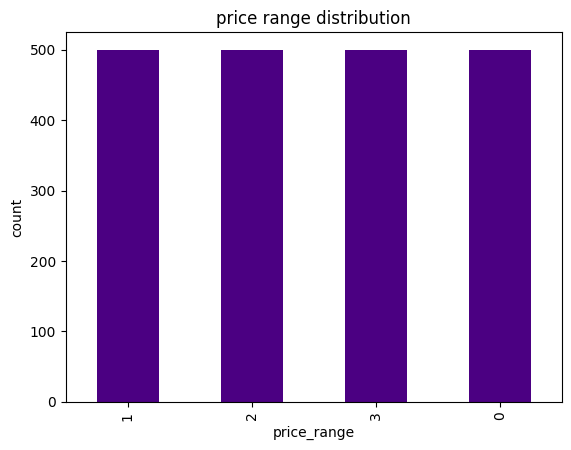

In [12]:
# VISUALIZE THE CLASS DISTRIBUTION
data_frame['price_range'].value_counts().plot(kind='bar',title="price range distribution",color='indigo')
plt.xlabel('price_range')
plt.ylabel('count')

In [13]:
# PAIRPLOTS 
# sns.pairplot(data_frame,hue='price_range')
# plt.show()

  0%|          | 0/21 [00:00<?, ?it/s]

100%|██████████| 21/21 [00:01<00:00, 19.43it/s]


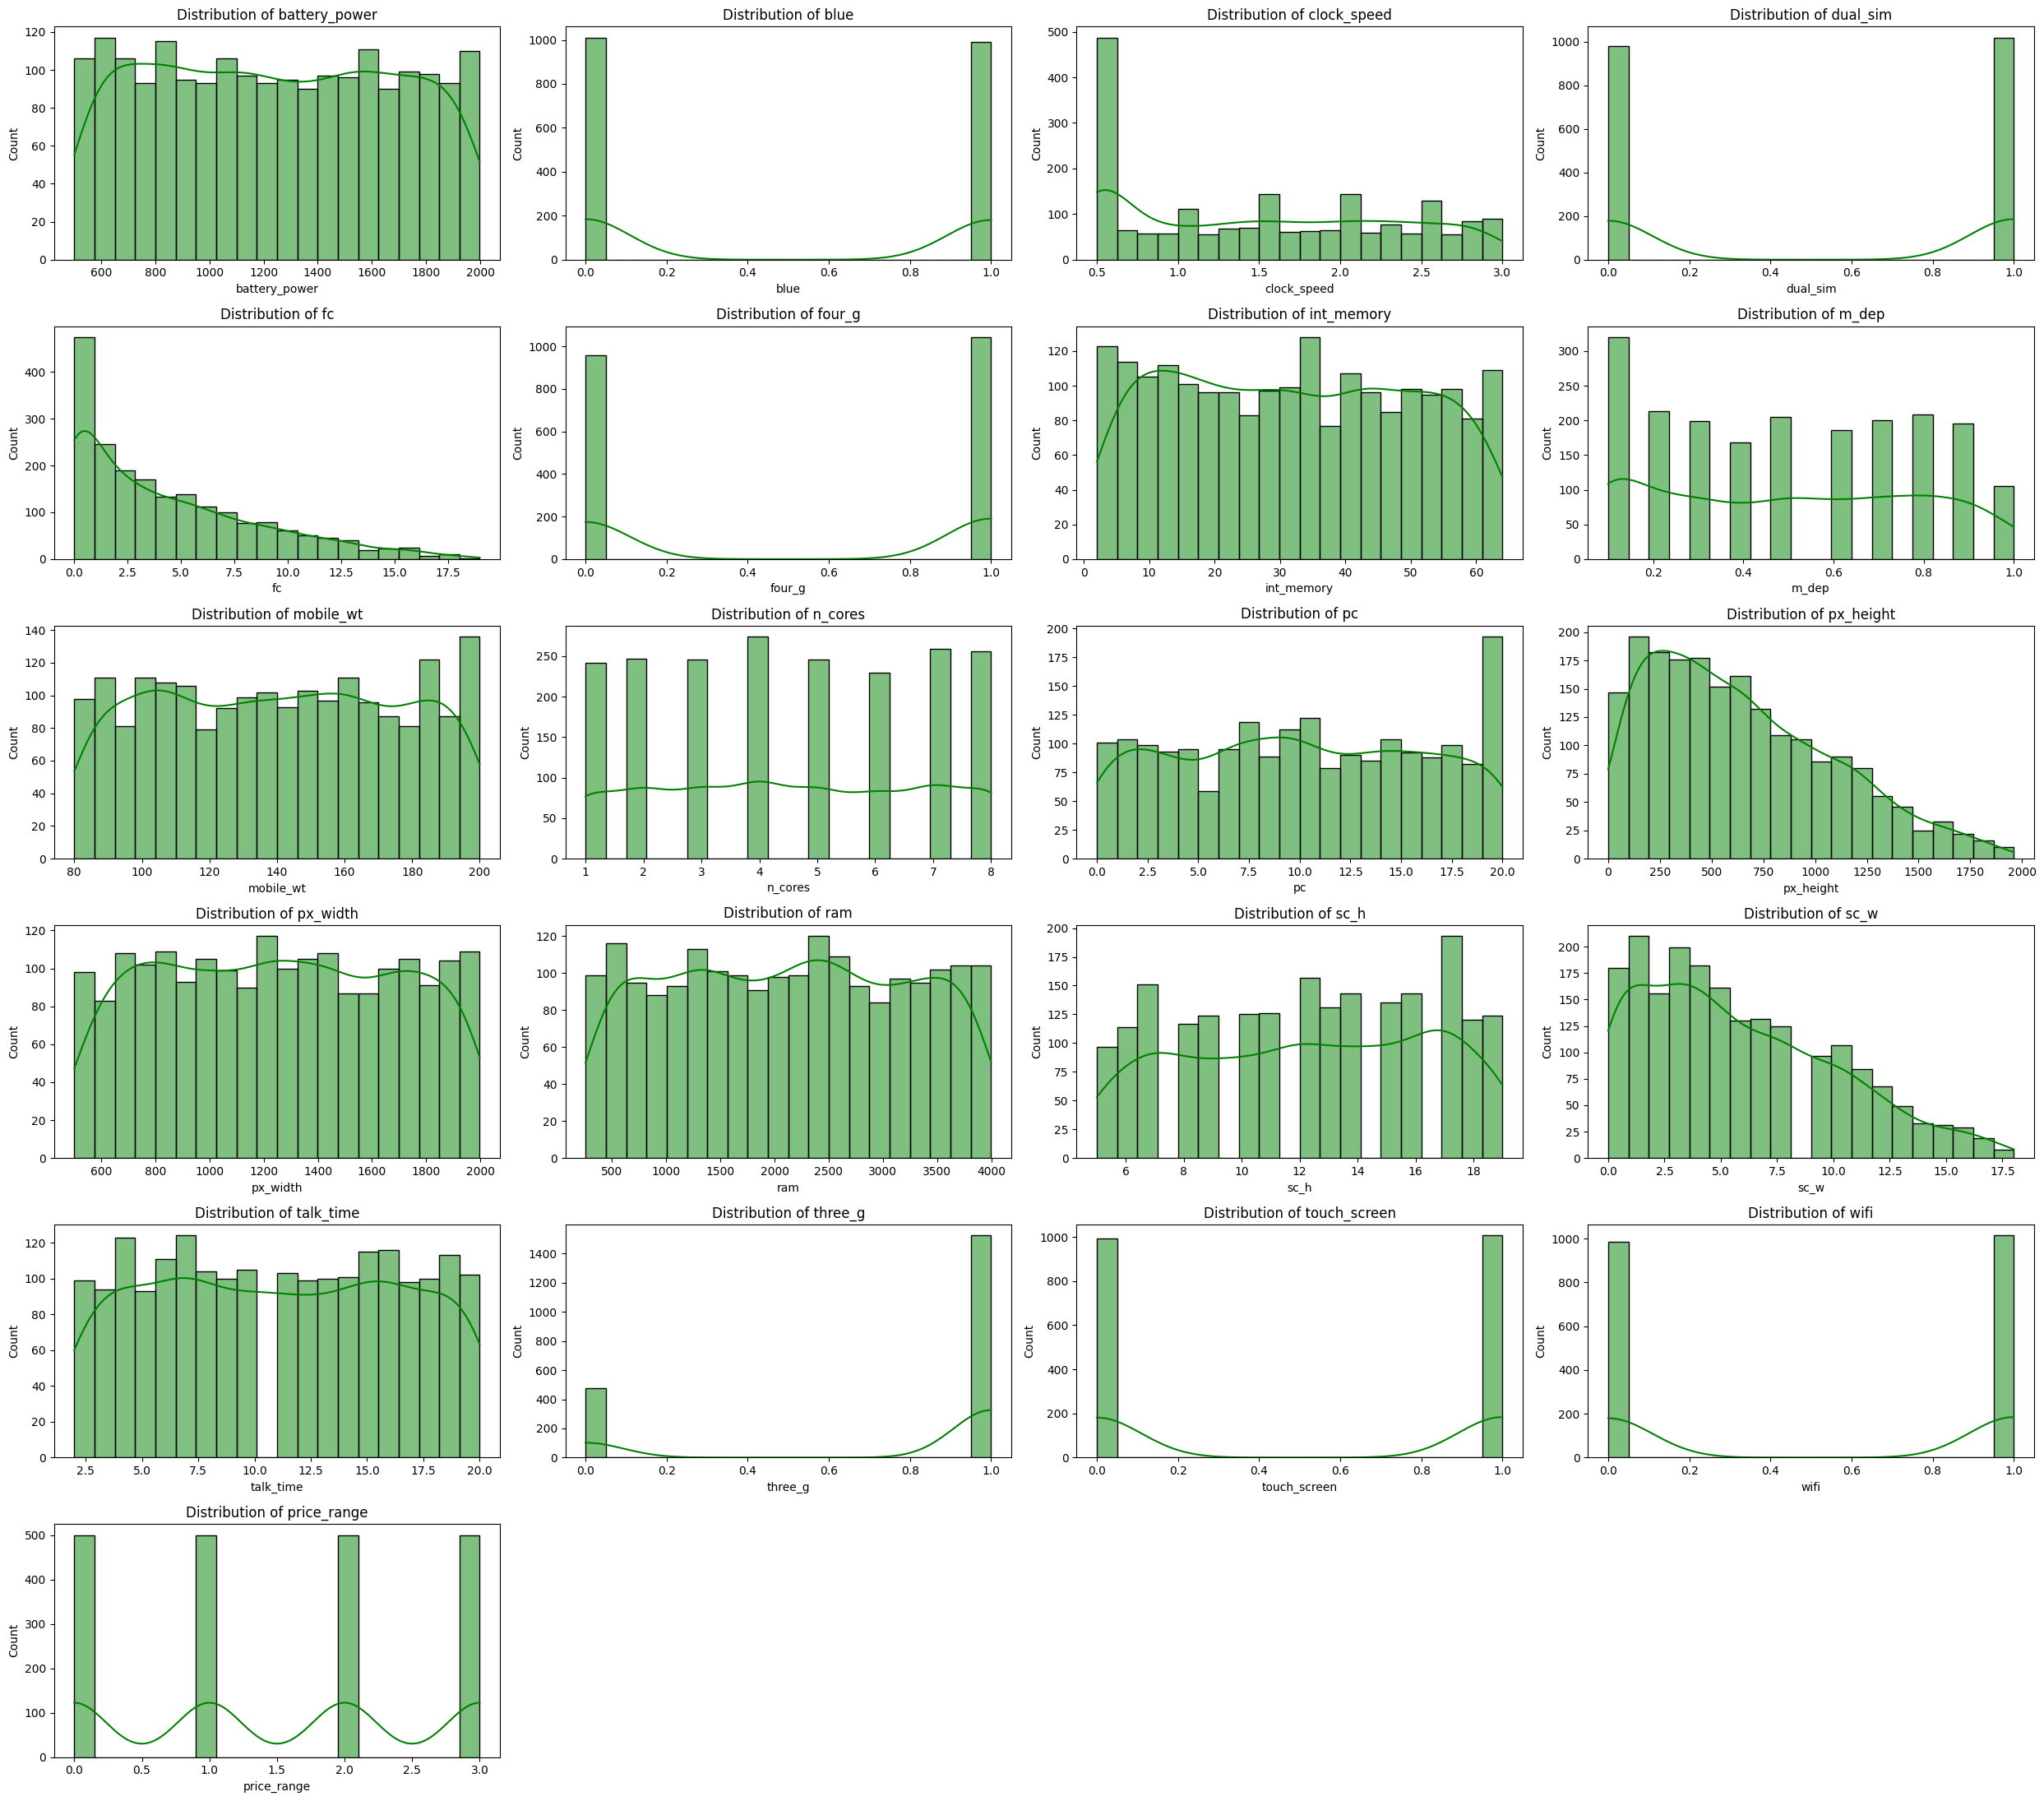

In [14]:
# EXPLORING INDIVIDUAL FEATURES DISTRIBUTION by HISTOGRAM
row = 6
col = 4
plt.figure(figsize=(25,22))
count = 1
for feature in tqdm(features_list):
    plt.subplot(row, col, count) 
    sns.histplot(data_frame[feature], bins=20, kde=True,color='g')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Count')
    count += 1

# Adjust the layout so it fits well
plt.tight_layout()
plt.show()



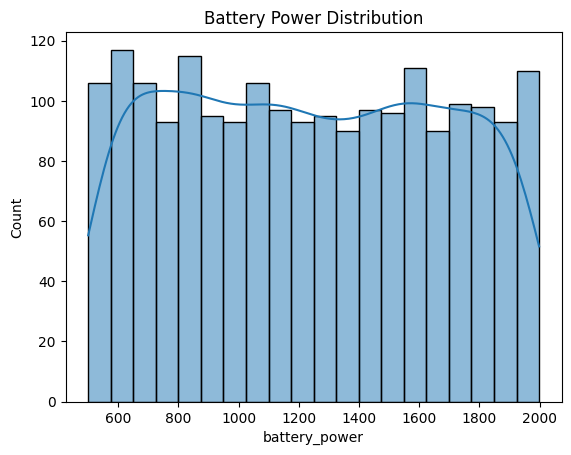

In [15]:
# Visualize distributions
sns.histplot(data_frame['battery_power'], bins=20, kde=True)
plt.title("Battery Power Distribution")
plt.show()

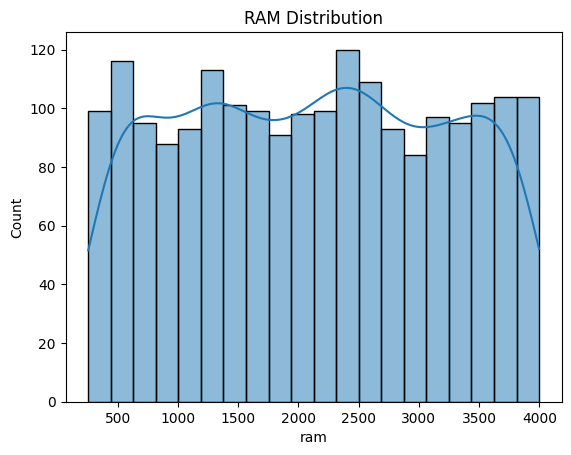

In [16]:
# Visualize distributions
sns.histplot(data_frame['ram'], bins=20, kde=True)
plt.title("RAM Distribution")
plt.show()

C:\Users\Sayan\AppData\Local\Temp\ipykernel_22936\189992471.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_frame, x='four_g', palette='Set2')


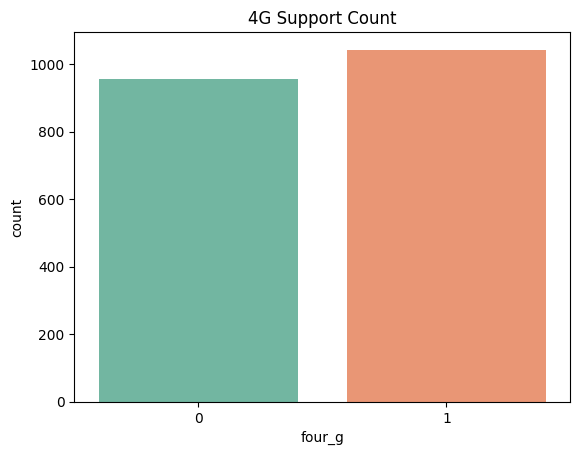

In [17]:
#CATEGORICAL FEATURES

# 4G Support Count
sns.countplot(data=data_frame, x='four_g', palette='Set2')
plt.title('4G Support Count')
plt.show()

In [18]:
# EXPLORING INDIVIDUAL FEATURES DISTRIBUTION by HISTOGRAM
# row = 6
# col = 4
# plt.figure(figsize=(25,22))
# count = 1
# for feature in tqdm(features_list):
#     plt.subplot(row, col, count) 
#     sns.countplot(data_frame,x=feature, palette='Set2')
#     plt.title(f"Distribution of {feature}")
#     plt.xlabel(feature)
#     plt.ylabel('Count')
#     count += 1

# # Adjust the layout so it fits well
# plt.tight_layout()
# plt.show()



C:\Users\Sayan\AppData\Local\Temp\ipykernel_22936\4071154533.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_frame, x='price_range', palette='Set2')


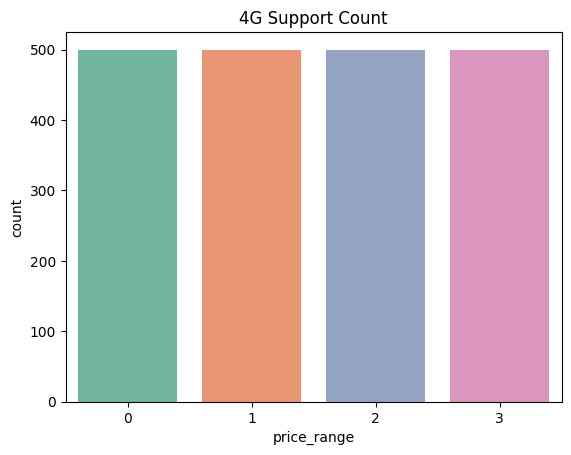

In [19]:
#CATEGORICAL FEATURES

# brand Count
sns.countplot(data=data_frame, x='price_range', palette='Set2')
plt.title('4G Support Count')
plt.show()

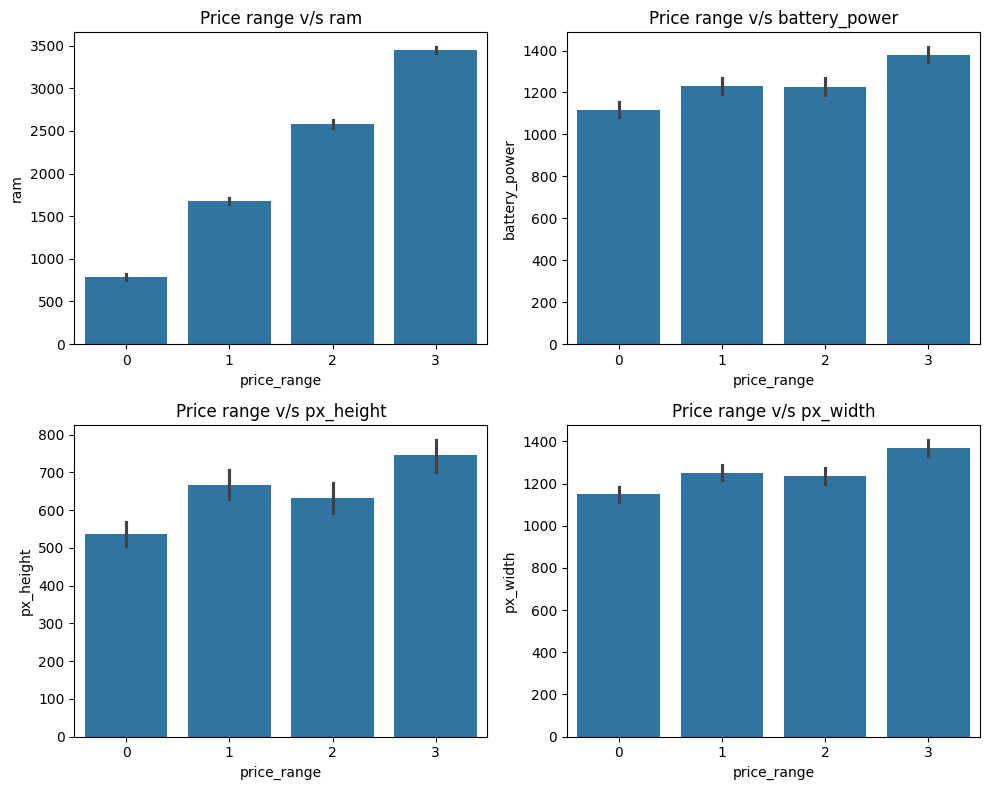

In [20]:
# plotting  price_range vs some other fearures
plt.figure(figsize=(10,8))

variables=['ram','battery_power','px_height','px_width']
counter=1
for var in variables:
  plt.subplot(2,2,counter)
  sns.barplot(x=data_frame['price_range'],y=data_frame[var])
  plt.title(f'Price range v/s {var}')
  counter+=1
  plt.tight_layout()

In [21]:
desc_stats = data_frame['ram'].describe()
desc_stats

count    2000.000000
mean     2124.213000
std      1084.732044
min       256.000000
25%      1207.500000
50%      2146.500000
75%      3064.500000
max      3998.000000
Name: ram, dtype: float64

In [22]:
# BOX PLOT VALUES

100%|██████████| 21/21 [00:00<00:00, 27.93it/s]


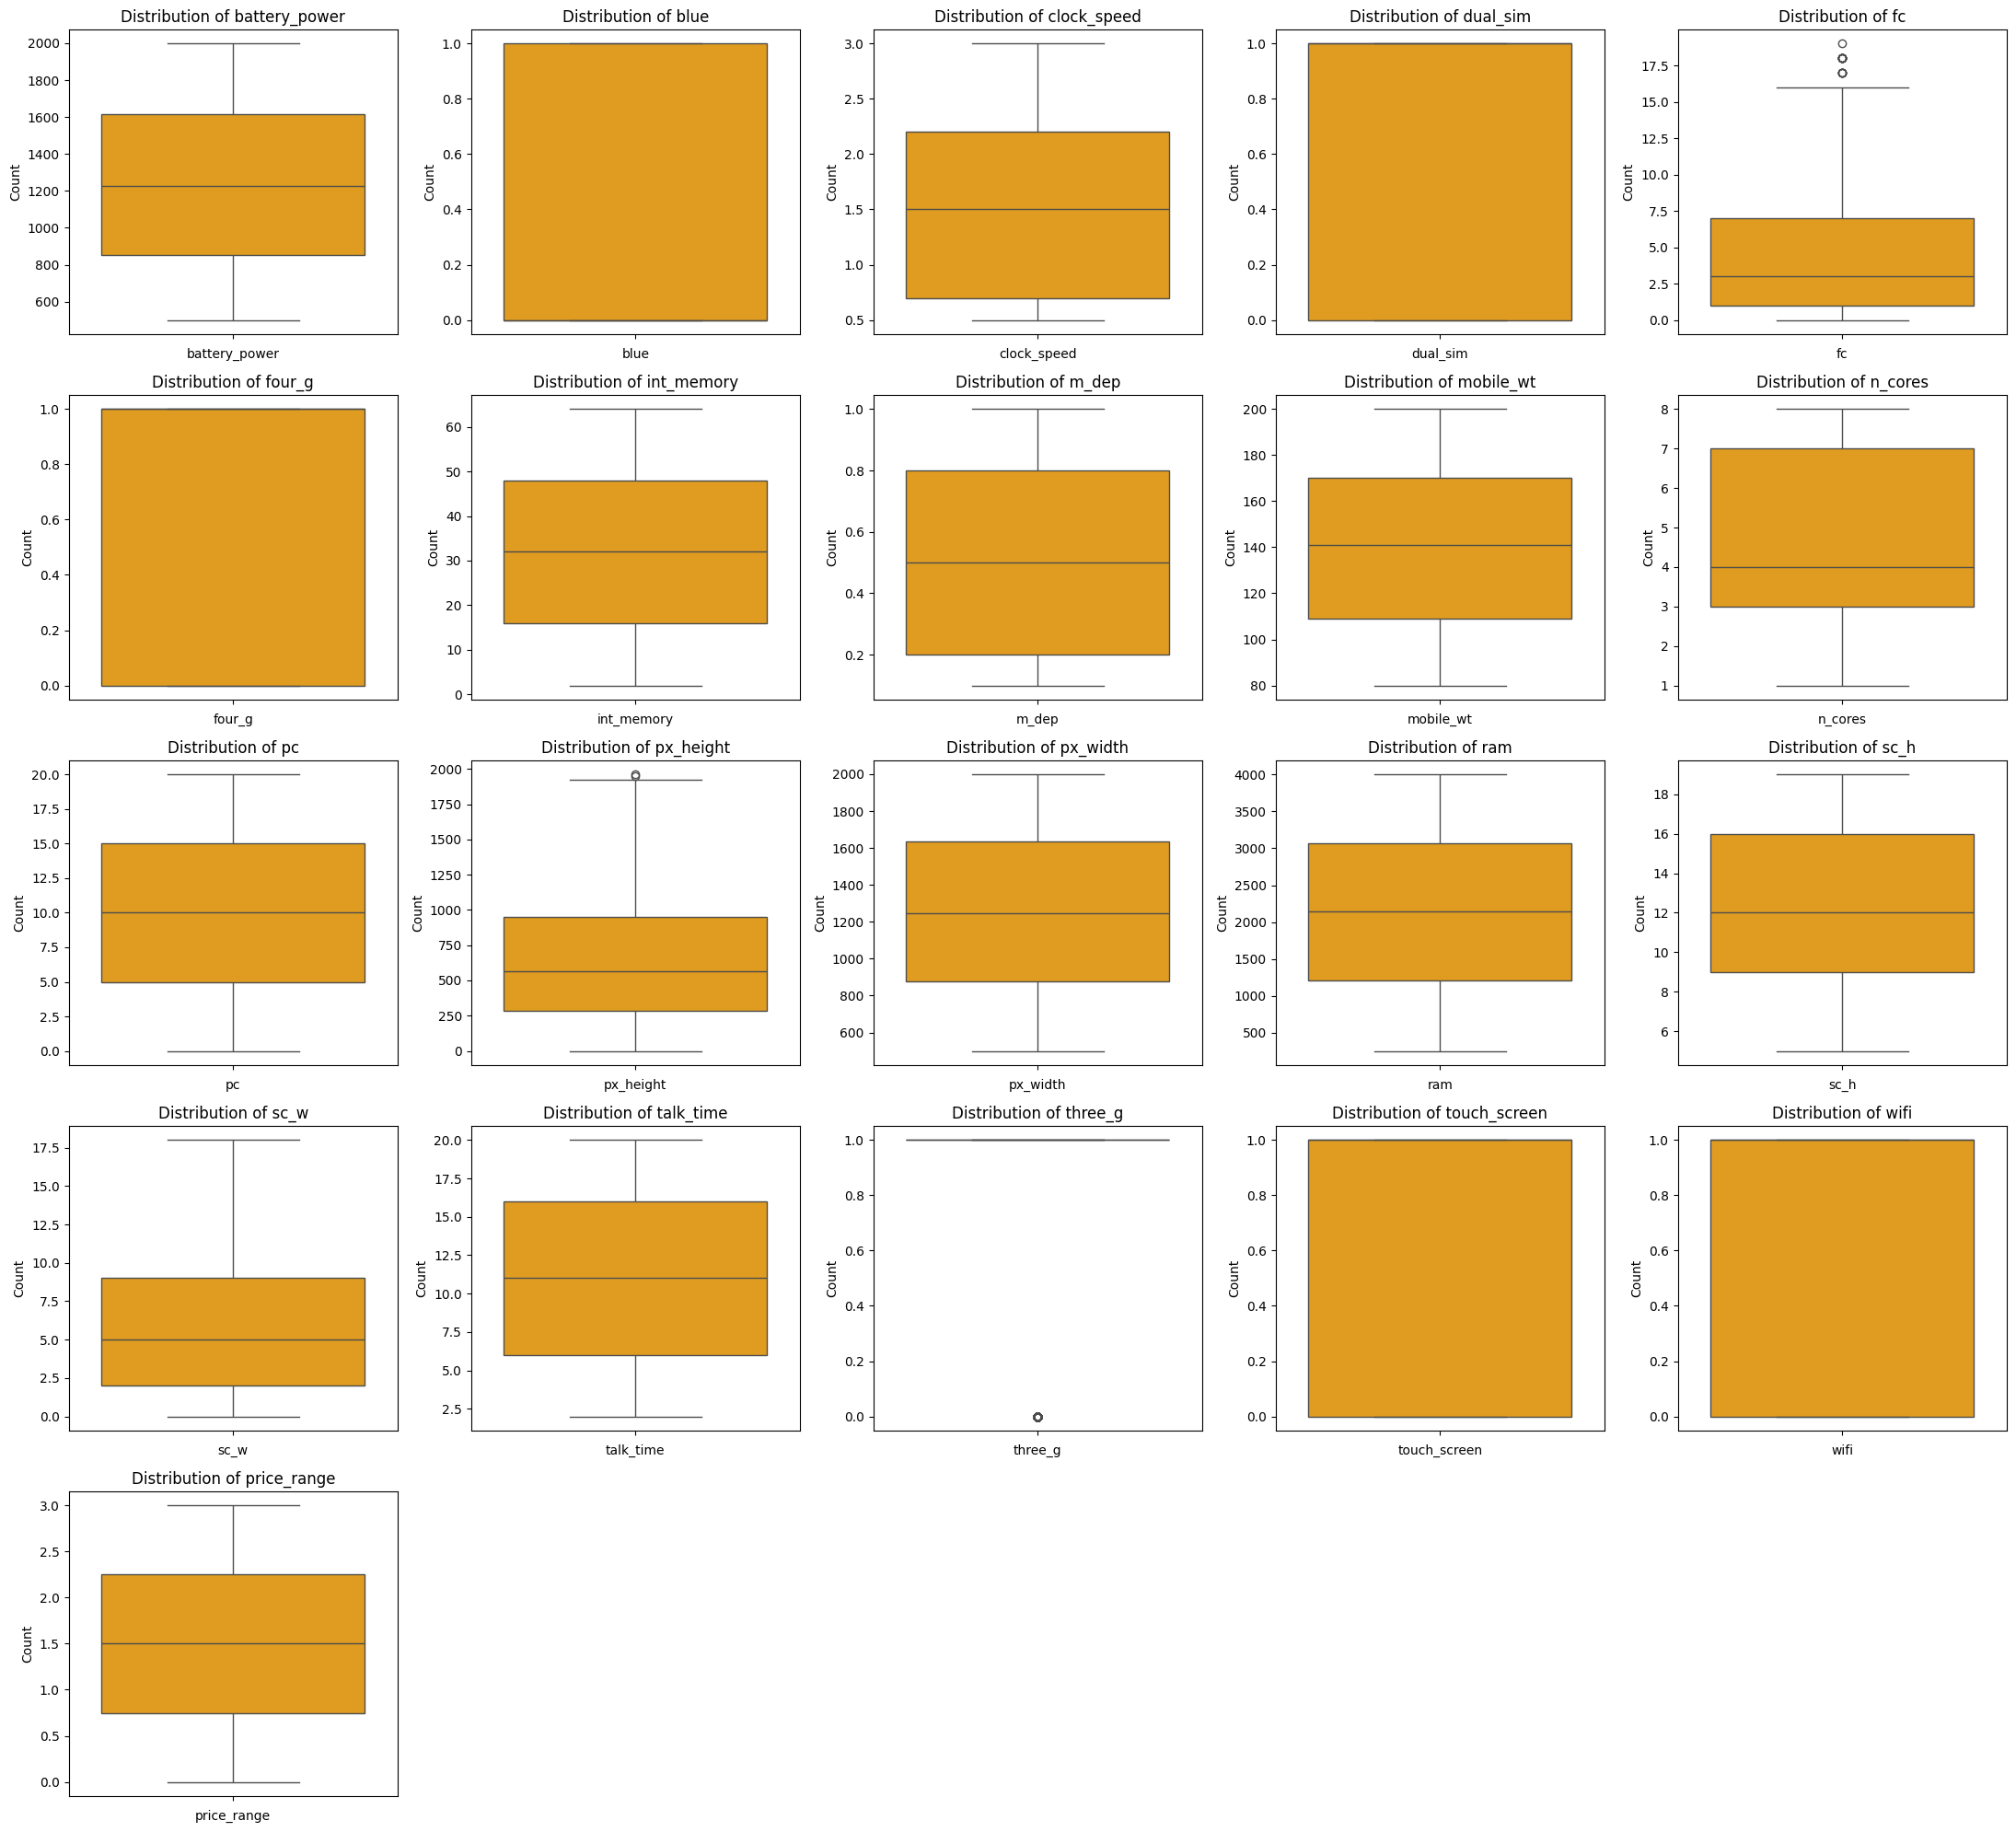

In [23]:
# BOXPLOT VISUALIZATION
row = 5
col = 5
plt.figure(figsize=(22,20))
count = 1
for feature in tqdm(features_list):
    plt.subplot(row, col, count) 
    sns.boxplot(data_frame[feature],color='orange')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Count')
    count += 1

# Adjust the layout so it fits well
plt.tight_layout()
plt.show()


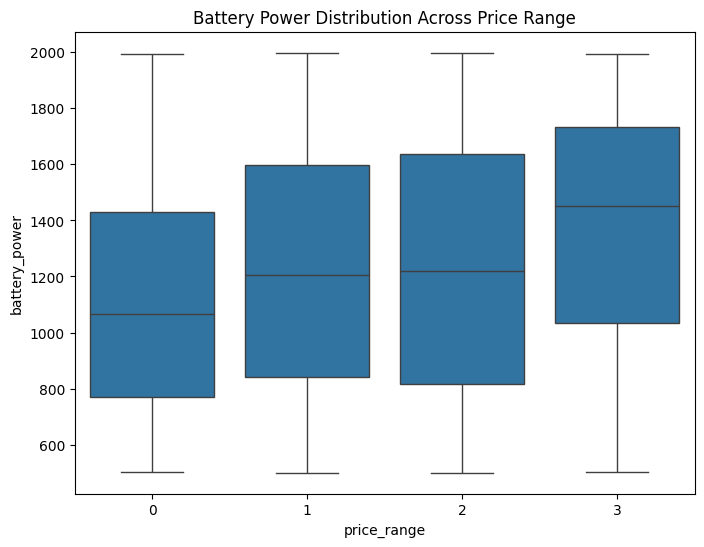

In [24]:
# SEPERATE BOX PLOT
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_frame, x='price_range', y='battery_power')
plt.title("Battery Power Distribution Across Price Range")
plt.show()

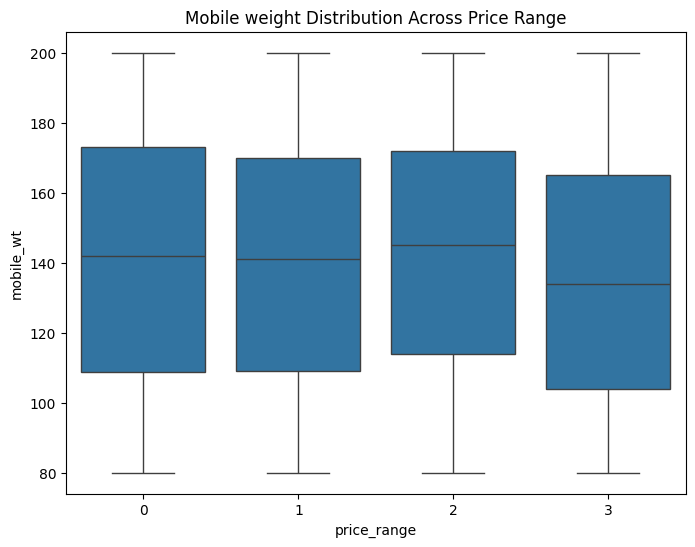

In [25]:
# SEPERATE BOX PLOT
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_frame, x='price_range', y='mobile_wt')
plt.title("Mobile weight Distribution Across Price Range")
plt.show()

In [26]:
# DIFINE CATEGORICAL AND NUMERICAL FEATURE
numerical_columns =[ feature for feature in data_frame.columns if data_frame[feature].dtype !='O']
categorical_columns =[ feature for feature in data_frame.columns if data_frame[feature].dtype =='O']
print('WE HAVE {} NUMERICAL FEATURES :{}'.format(len(numerical_columns),numerical_columns))
print('WE HAVE {} CATEGORICAL FEATURES :{}'.format(len(categorical_columns),categorical_columns))

WE HAVE 21 NUMERICAL FEATURES :['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']
WE HAVE 0 CATEGORICAL FEATURES :[]


In [27]:
# CORRELATION TABLE
data_frame[numerical_columns].corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


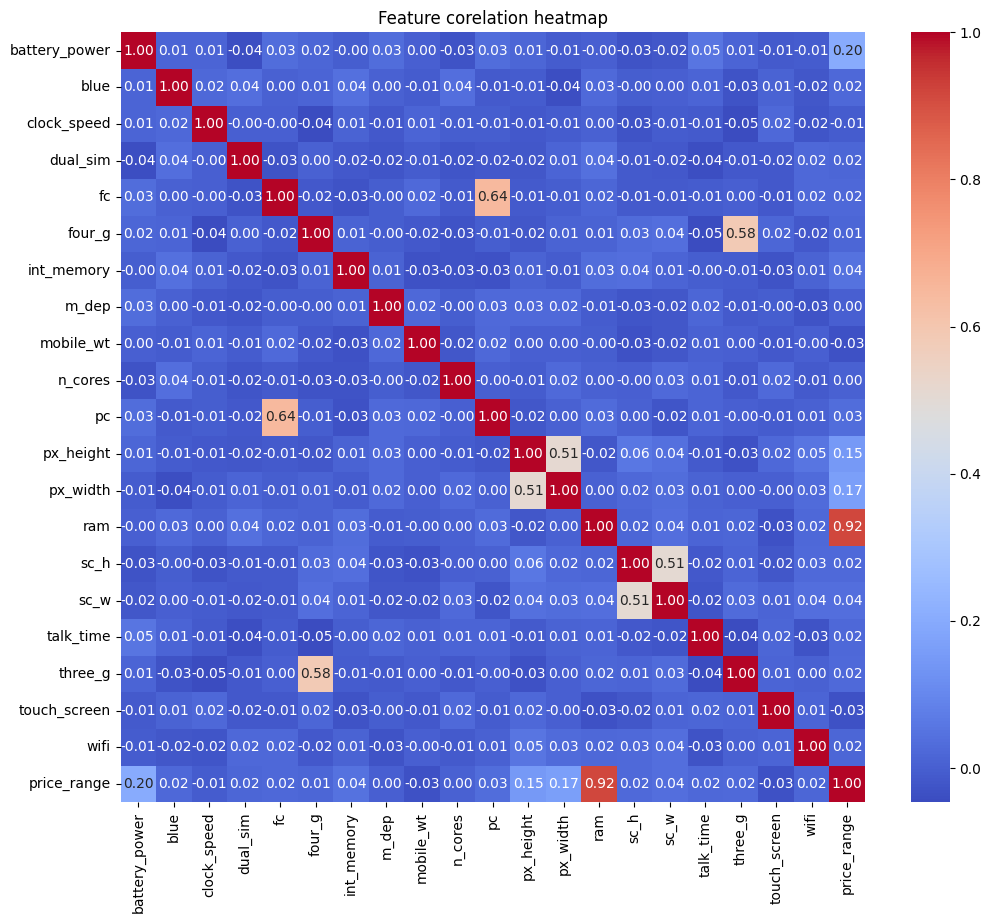

In [28]:
# VISUALIZING RELATIONSHIP(CORRELATION HEATMAP)TO FIND FEATURES STRONGLY RELATED TO price_range
plt.figure(figsize=(12,10))
sns.heatmap(data_frame[numerical_columns].corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Feature corelation heatmap')
plt.show()

### STEP-4:DATA PREPROCESSING


In [29]:
# CHECK FOR MSSING VALUE
missing_values = data_frame.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


##### NO MISSING VALUE SO WE DONT NEED TO HANDLE MISSING VALUE

### STEP-5:FEATURE ENGINEERING

In [30]:
# ADD NEW FEATURE
data_frame['px_area'] = data_frame['px_height'] * data_frame['px_width']
data_frame['screen_area'] = data_frame['sc_h'] * data_frame['sc_w']
# data_frame['battery_performance'] = data_frame['battery_power'] / data_frame['mobile_wt']
data_frame=data_frame.drop(['px_height','px_width','sc_h','sc_w'],axis=1)
data_frame.head() #THE NEW DATASET



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range,px_area,screen_area
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,19,0,0,1,1,15120,63
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,7,1,1,0,2,1799140,51
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,9,1,1,0,2,2167308,22
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,11,1,0,0,2,2171776,128
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,15,1,1,0,1,1464096,16


In [31]:
data_frame.shape

(2000, 19)

### STEP-6:ENCODING CATEGORICAL VARIABLES

### STEP-7:FEATURE SELECTION

In [32]:
# from sklearn.feature_selection import SelectKBest, f_classif

# # Assuming data_frame is your original DataFrame
# df_copy = data_frame.copy()

# # Separate features (X) and target variable (y)
# y = df_copy.pop('price_range')
# X = df_copy

# # Select the top 10 features based on F-values (ANOVA F-test)
# feature_selector = SelectKBest(f_classif, k=10)  # Here, k is the number of features you want to keep
# X_selected = feature_selector.fit_transform(X, y)

# # Get the selected features' names
# selected_features = X.columns[feature_selector.get_support()]

# # Display the selected features
# print("Selected features based on F-values (ANOVA F-test):")
# selected_features


In [33]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np

# Assuming data_frame is your original DataFrame
df_copy = data_frame.copy()

# Separate features (X) and target variable (y)
y = df_copy.pop('price_range')
X = df_copy

# Select features using f_classif (ANOVA F-test), with p-value filtering
feature_selector = SelectKBest(f_classif, k='all')  # 'all' to keep all features for now
X_selected = feature_selector.fit_transform(X, y)

# Get the p-values and F-scores for each feature
p_values = feature_selector.pvalues_
f_scores = feature_selector.scores_

# Select features where p-value < 0.05 (95% confidence)
selected_features = X.columns[p_values < 0.05]

# Display the selected features based on p-value and their corresponding F-scores
print("Selected features based on p-values (p-value < 0.05):")
for feature, p_value, f_score in zip(X.columns, p_values, f_scores):
    print(f"Feature: {feature}, P-value: {p_value:.4f}, F-score: {f_score:.4f}")

print("\nFeatures with p-value < 0.05:")
print(selected_features)


Selected features based on p-values (p-value < 0.05):
Feature: battery_power, P-value: 0.0000, F-score: 31.5982
Feature: blue, P-value: 0.6985, F-score: 0.4768
Feature: clock_speed, P-value: 0.6867, F-score: 0.4937
Feature: dual_sim, P-value: 0.7328, F-score: 0.4282
Feature: fc, P-value: 0.5095, F-score: 0.7722
Feature: four_g, P-value: 0.3652, F-score: 1.0595
Feature: int_memory, P-value: 0.0328, F-score: 2.9230
Feature: m_dep, P-value: 0.2125, F-score: 1.5007
Feature: mobile_wt, P-value: 0.0131, F-score: 3.5943
Feature: n_cores, P-value: 0.0489, F-score: 2.6254
Feature: pc, P-value: 0.4797, F-score: 0.8254
Feature: ram, P-value: 0.0000, F-score: 3520.1108
Feature: talk_time, P-value: 0.1807, F-score: 1.6288
Feature: three_g, P-value: 0.7122, F-score: 0.4573
Feature: touch_screen, P-value: 0.2750, F-score: 1.2933
Feature: wifi, P-value: 0.8363, F-score: 0.2849
Feature: px_area, P-value: 0.0000, F-score: 26.0068
Feature: screen_area, P-value: 0.0885, F-score: 2.1799

Features with p-va

In [34]:
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import RandomForestClassifier

# # Assuming data_frame is your original DataFrame
# df_copy = data_frame.copy()

# # Separate features (X) and target variable (y)
# y = df_copy.pop('price_range')
# X = df_copy

# # Initialize the model
# model = RandomForestClassifier(random_state=42)

# # Find the optimal k based on cross-validation performance
# best_k = 1  # Initialize with the smallest k
# best_score = 0  # Initialize with a very low score

# # Evaluate for different values of k
# for k in range(1, X.shape[1] + 1):
#     feature_selector = SelectKBest(f_classif, k=k)
#     X_selected = feature_selector.fit_transform(X, y)
    
#     # Perform cross-validation
#     score = cross_val_score(model, X_selected, y, cv=5).mean()
    
#     # Update the best k if the current score is better
#     if score > best_score:
#         best_score = score
#         best_k = k

# # Select the optimal k features
# feature_selector = SelectKBest(f_classif, k=best_k)
# X_selected = feature_selector.fit_transform(X, y)

# # Get the selected features' names
# selected_features = X.columns[feature_selector.get_support()]

# # Display the selected features and the optimal k
# print(f"The optimal k is {best_k} based on cross-validation.")
# print(f"Selected features based on F-values (ANOVA F-test):")
# print(selected_features)


In [35]:
# Get the selected input variable names
# selected_columns = selected_variable['input_variable'].values
# Display the corresponding columns from the original dataset
data_frame[selected_features]

,battery_power,int_memory,mobile_wt,n_cores,ram,px_area
0,842,7,188,2,2549,15120
1,1021,53,136,3,2631,1799140
2,563,41,145,5,2603,2167308
3,615,10,131,6,2769,2171776
4,1821,44,141,2,1411,1464096
...,...,...,...,...,...,...
1995,794,2,106,6,668,2309580
1996,1965,39,187,4,2032,1797975
1997,1911,36,108,8,3057,1416576
1998,1512,46,145,5,869,225120


### STEP-8:DATA TRANSFORMATION

In [36]:
X=data_frame[selected_features]
y=data_frame['price_range']


100%|██████████| 6/6 [00:00<00:00,  7.36it/s]


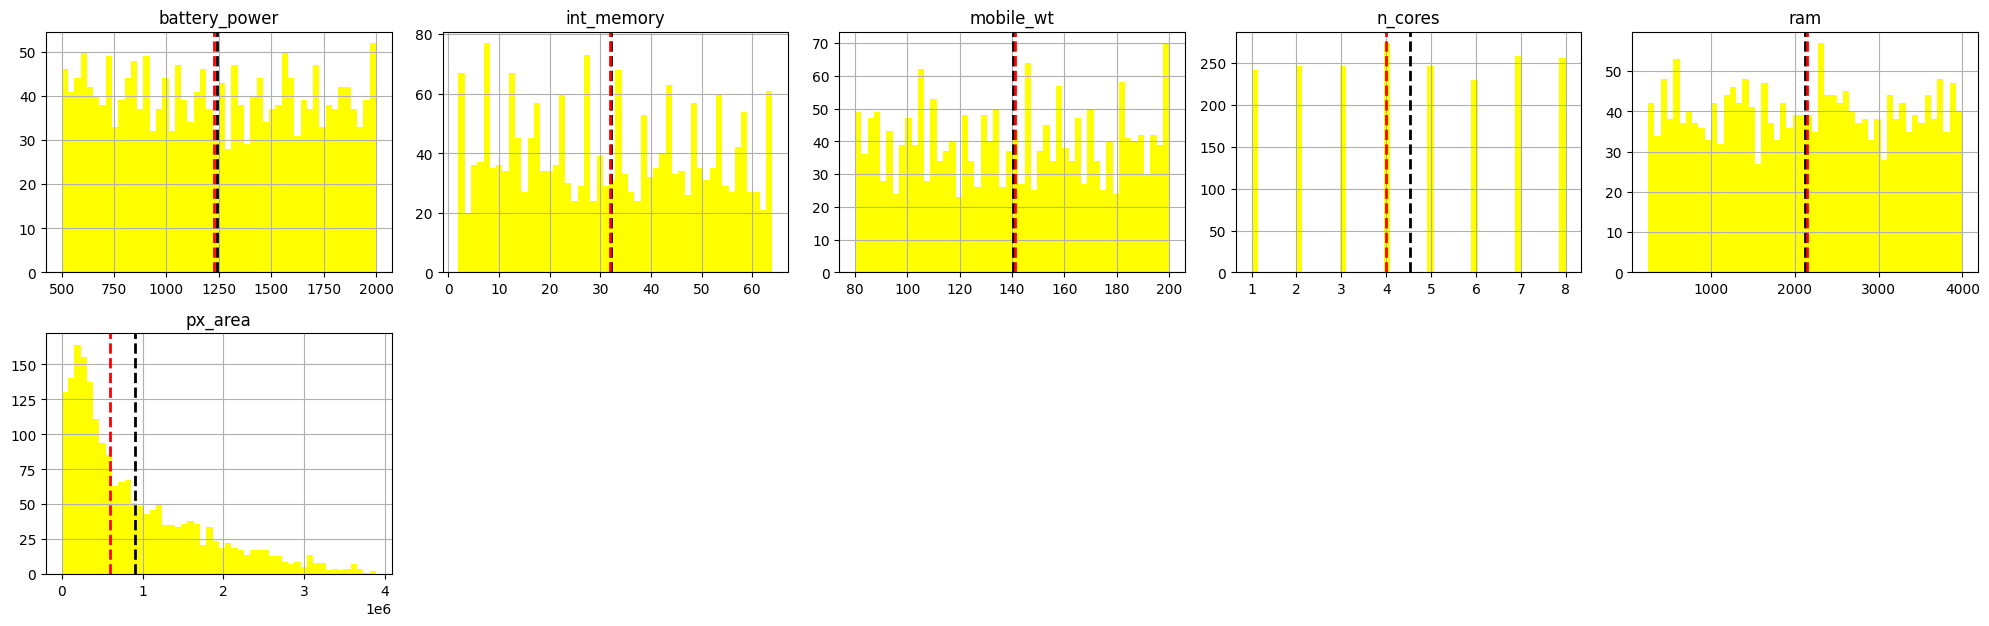

In [37]:
counter=1
fig = plt.figure(figsize=(20,15))
for col in tqdm(X.columns): 
  plt.subplot(5,5,counter)
  ax = fig.gca()
  X[col].hist(bins=50, ax = ax,color='yellow') 
  ax.axvline(X[col].mean(), color = 'black',linestyle='dashed', linewidth=2) 
  ax.axvline(X[col].median(), color = 'red',linestyle='dashed', linewidth=2) 
  ax.set_title(col)
  counter=counter+1
  plt.tight_layout()

##### HERE screen_area AND px_area ARE NOT IN NORMALIZED

In [38]:
# Transform Your data
from sklearn import preprocessing
pt=preprocessing.PowerTransformer(copy=False)
X[['px_area']]=pt.fit_transform(X[['px_area']])

C:\Users\Sayan\AppData\Local\Temp\ipykernel_22936\374847526.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['px_area']]=pt.fit_transform(X[['px_area']])


100%|██████████| 1/1 [00:00<00:00, 15.87it/s]


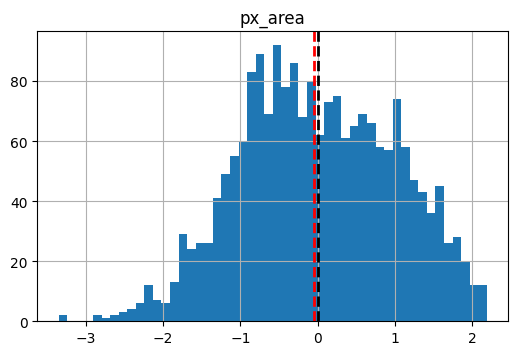

In [39]:
# FOR CHECKING THE COLUMNS ARE NORMALIZED OR NOT
counter=1
fig = plt.figure(figsize=(15,10))
for col in tqdm(['px_area']):
  plt.subplot(3,3,counter)
  ax = fig.gca()
  X[col].hist(bins=50, ax = ax) 
  ax.axvline(X[col].mean(), color = 'black',linestyle='dashed', linewidth=2) 
  ax.axvline(X[col].median(), color = 'red',linestyle='dashed', linewidth=2) 
  ax.set_title(col)
  counter=counter+1
  plt.tight_layout()

### STEP-9:SPLIT THE DATA AND SCALING

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 6)
(400, 6)
(1600,)
(400,)


In [41]:
# Define the pipeline with PowerTransformer and StandardScaler
pipeline = Pipeline([
    ('scaler', StandardScaler())  # Step 2: Standardize the data
])

# Fit the pipeline on the training data
pipeline.fit(X_train)

# Transform the training and test data
X_train_scaled = pipeline.transform(X_train)
X_test_scaled = pipeline.transform(X_test)

In [59]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),  # Ensuring probability=True for SVM
    'XGBoost': XGBClassifier(eval_metric='mlogloss'),
    'Voting Classifier': VotingClassifier(
        estimators=[('logreg', LogisticRegression()), 
        ('rf', RandomForestClassifier())], voting='hard'
    )
} 

In [63]:
# Initialize results list
results = []

# Iterate over models
for model_name, model in models.items():
    # Fit the model on the scaled training data
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred_test = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    
    # Calculate metrics for training data
    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train, average='weighted')
    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    f1_train = f1_score(y_train, y_pred_train, average='weighted')

    # Calculate metrics for test data
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')

    # Store the results for each model
    results.append({
        'Model': model_name,
        'Accuracy Train': accuracy_train,
        'Accuracy Test': accuracy_test,
        'Precision Train': precision_train,
        'Precision Test': precision_test,
        'Recall Train': recall_train,
        'Recall Test': recall_test,
        'F1-Score Train': f1_train,
        'F1-Score Test': f1_test,
        'y_pred Test': y_pred_test  # Store predicted values for test set for later use
    })

# Convert results into DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print("Results for `price_range` prediction:\n")
results_df


Results for `price_range` prediction:



,Model,Accuracy Train,Accuracy Test,Precision Train,Precision Test,Recall Train,Recall Test,F1-Score Train,F1-Score Test,y_pred Test
0,Logistic Regression,0.943125,0.9500,0.943065,0.950751,0.943125,0.9500,0.943071,0.950200,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 3, ..."
1,KNN,0.881875,0.7600,0.882793,0.768319,0.881875,0.7600,0.882161,0.762744,"[0, 2, 1, 3, 1, 1, 1, 0, 3, 1, 1, 1, 2, 3, 3, ..."
2,Random Forest,1.000000,0.9000,1.000000,0.900875,1.000000,0.9000,1.000000,0.900160,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, ..."
3,Decision Tree,1.000000,0.8400,1.000000,0.843573,1.000000,0.8400,1.000000,0.841432,"[0, 2, 1, 3, 1, 2, 2, 0, 2, 1, 0, 1, 2, 3, 3, ..."
4,SVM,0.951875,0.9175,0.951999,0.921265,0.951875,0.9175,0.951902,0.918080,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 3, ..."
5,XGBoost,1.000000,0.9125,1.000000,0.913700,1.000000,0.9125,1.000000,0.912583,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 3, ..."
6,Voting Classifier,0.970000,0.9050,0.970352,0.908775,0.970000,0.9050,0.969995,0.905151,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, ..."


In [44]:
result_copy=results_df[['Model','y_pred Test']]
result_copy

,Model,y_pred Test
0,Logistic Regression,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 3, ..."
1,KNN,"[0, 2, 1, 3, 1, 1, 1, 0, 3, 1, 1, 1, 2, 3, 3, ..."
2,Random Forest,"[0, 2, 1, 3, 1, 2, 2, 0, 3, 1, 0, 1, 2, 3, 2, ..."
3,Decision Tree,"[0, 2, 1, 3, 1, 2, 2, 0, 2, 1, 0, 1, 2, 3, 3, ..."
4,SVM,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 3, ..."
5,XGBoost,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 3, ..."
6,Voting Classifier,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, ..."


##### PLOT THE CONFUSION MATRIX

The vales of confusion matrix fo the model:Logistic Regression is:
[[101   4   0   0]
 [  3  86   2   0]
 [  0   3  87   2]
 [  0   0   6 106]]


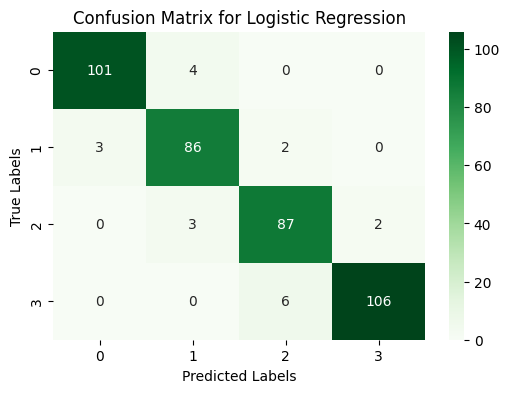

The vales of confusion matrix fo the model:KNN is:
[[89 16  0  0]
 [15 63 13  0]
 [ 0 15 65 12]
 [ 0  0 25 87]]


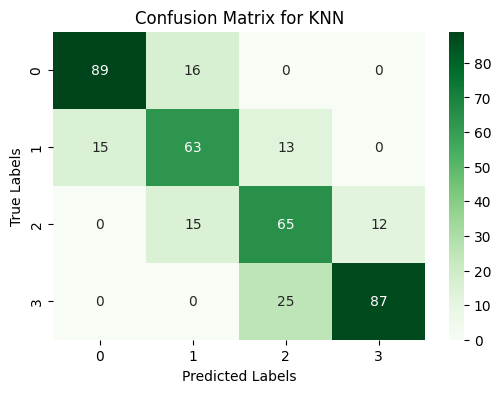

The vales of confusion matrix fo the model:Random Forest is:
[[101   4   0   0]
 [  4  82   5   0]
 [  0   8  79   5]
 [  0   0  13  99]]


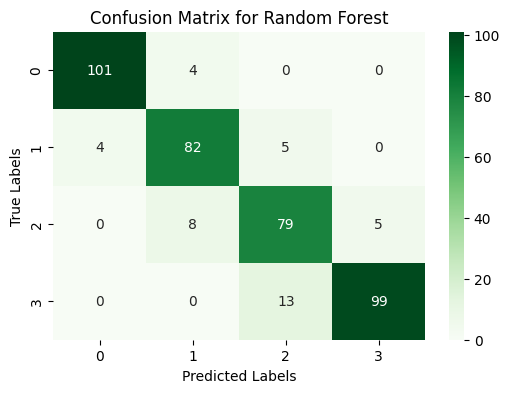

The vales of confusion matrix fo the model:Decision Tree is:
[[ 93  12   0   0]
 [  6  69  16   0]
 [  0  13  69  10]
 [  0   0  12 100]]


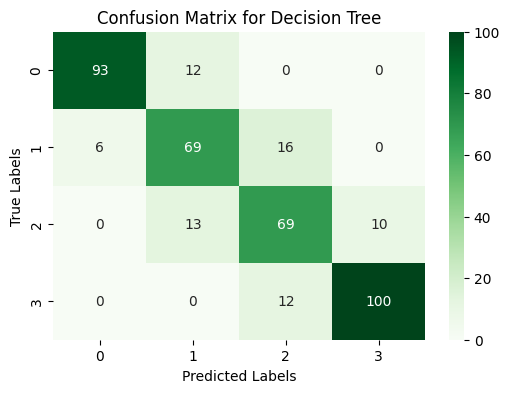

The vales of confusion matrix fo the model:SVM is:
[[103   2   0   0]
 [  5  81   5   0]
 [  0   6  84   2]
 [  0   0  13  99]]


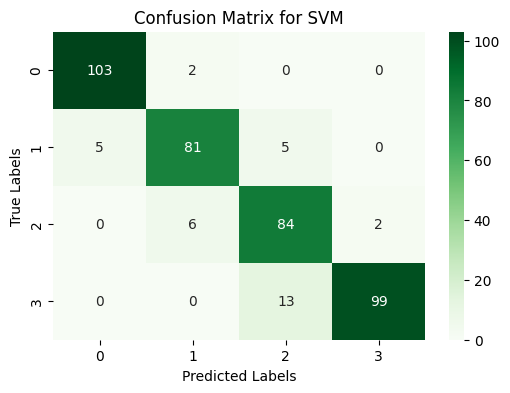

The vales of confusion matrix fo the model:XGBoost is:
[[ 99   6   0   0]
 [  3  85   3   0]
 [  0   8  77   7]
 [  0   0   8 104]]


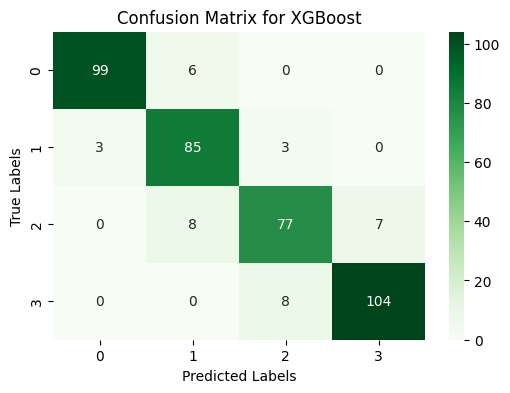

The vales of confusion matrix fo the model:Voting Classifier is:
[[102   3   0   0]
 [  7  83   1   0]
 [  0  10  80   2]
 [  0   0  19  93]]


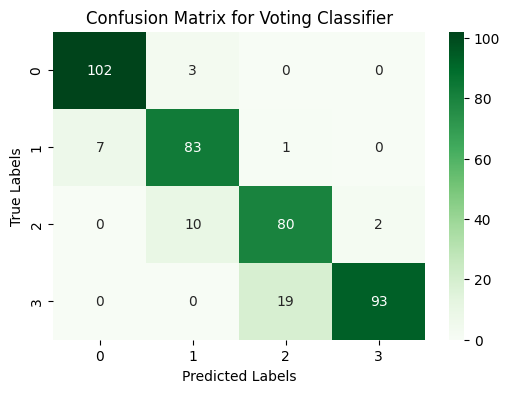

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iterate over each row in the result_copy DataFrame
for idx,row in result_copy.iterrows():
    # Get the model name and predicted values (y_pred)
    model_name = row['Model']
    y_pred = row['y_pred Test']

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix using seaborn heatmap
    print(f"The vales of confusion matrix fo the model:{model_name} is:\n{cm}")
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import pandas as pd

param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],  # Regularization strength for Logistic Regression
        'solver': ['liblinear', 'saga']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'probability': [True]
    },
    'XGBoost': {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [50, 100],
        'max_depth': [3, 6]
    },
    'Voting Classifier': {
        'voting': ['hard', 'soft']
    }
}

# Initialize results list
results_tuned = []

# Iterate over models and perform hyperparameter tuning
for model_name, model in models.items():
    # Define GridSearchCV with parameter grid
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', verbose=1)
    
    # Fit the GridSearchCV
    grid_search.fit(X_train_scaled, y_train)
    
    # Get the best parameters and score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Use the best model from the grid search for evaluation
    best_model = grid_search.best_estimator_

    # Predict on both training and test data
    y_train_pred = best_model.predict(X_train_scaled)
    y_test_pred = best_model.predict(X_test_scaled)
    
    # Calculate metrics for training set
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')

    # Calculate metrics for test set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    # Store all the results in the results list
    results_tuned.append({
        'Model': model_name,
        'Best Parameters': best_params,
        'Best Score': best_score,
        
        # Train metrics
        'Accuracy Train': accuracy_train,
        'Precision Train': precision_train,
        'Recall Train': recall_train,
        'F1-Score Train': f1_train,        
        
        # Test metrics
        'Accuracy Test': accuracy_test,
        'Precision Test': precision_test,
        'Recall Test': recall_test,
        'F1-Score Test': f1_test,
        'y_pred Test': y_test_pred  # Storing test predictions here
    })

# Convert results into DataFrame for better visualization
results_df_tuned = pd.DataFrame(results_tuned)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [54]:
print("Results for Hyperparameter Tuning and Cross-Validation:")
results_df_tuned

Results for Hyperparameter Tuning and Cross-Validation:


,Model,Best Parameters,Best Score,Accuracy Train,Precision Train,Recall Train,F1-Score Train,Accuracy Test,Precision Test,Recall Test,F1-Score Test,y_pred Test
0,Logistic Regression,"{'C': 10, 'solver': 'saga'}",0.941250,0.947500,0.947441,0.947500,0.947446,0.9475,0.948526,0.9475,0.947738,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 3, ..."
1,KNN,"{'n_neighbors': 7, 'weights': 'distance'}",0.782500,1.000000,1.000000,1.000000,1.000000,0.7975,0.804096,0.7975,0.799711,"[0, 2, 1, 3, 2, 1, 2, 0, 3, 1, 1, 1, 2, 3, 3, ..."
2,Random Forest,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",0.903750,0.998750,0.998752,0.998750,0.998750,0.9075,0.909350,0.9075,0.907788,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, ..."
3,Decision Tree,"{'max_depth': 10, 'min_samples_split': 2}",0.856250,0.987500,0.987549,0.987500,0.987504,0.8525,0.856244,0.8525,0.853918,"[0, 2, 1, 3, 1, 2, 2, 0, 2, 1, 0, 1, 2, 3, 3, ..."
4,SVM,"{'C': 10, 'kernel': 'linear', 'probability': T...",0.943750,0.948125,0.948197,0.948125,0.948107,0.9375,0.938815,0.9375,0.937793,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 3, ..."
5,XGBoost,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.914375,1.000000,1.000000,1.000000,1.000000,0.9075,0.909929,0.9075,0.907925,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, ..."
6,Voting Classifier,{'voting': 'soft'},0.929375,0.995625,0.995651,0.995625,0.995625,0.9300,0.931185,0.9300,0.930269,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, ..."


In [55]:
results_df_tuned_copy=results_df_tuned[['Model','y_pred Test']]
results_df_tuned_copy

,Model,y_pred Test
0,Logistic Regression,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 3, ..."
1,KNN,"[0, 2, 1, 3, 2, 1, 2, 0, 3, 1, 1, 1, 2, 3, 3, ..."
2,Random Forest,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, ..."
3,Decision Tree,"[0, 2, 1, 3, 1, 2, 2, 0, 2, 1, 0, 1, 2, 3, 3, ..."
4,SVM,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 3, ..."
5,XGBoost,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, ..."
6,Voting Classifier,"[0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, ..."


The vales of confusion matrix fo the model:Logistic Regression is:
[[ 99   6   0   0]
 [  2  87   2   0]
 [  0   3  86   3]
 [  0   0   5 107]]


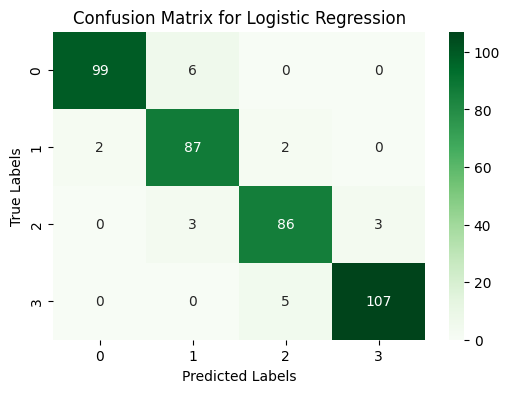

The vales of confusion matrix fo the model:KNN is:
[[91 14  0  0]
 [11 66 14  0]
 [ 0 11 70 11]
 [ 0  0 20 92]]


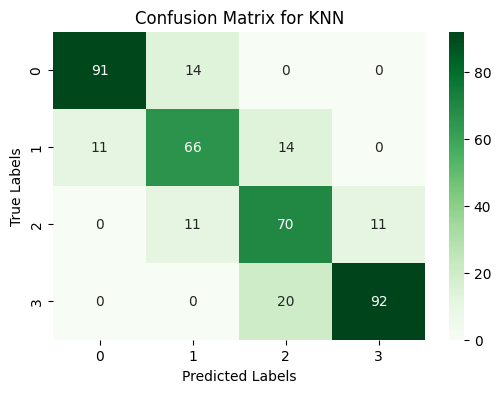

The vales of confusion matrix fo the model:Random Forest is:
[[101   4   0   0]
 [  5  84   2   0]
 [  0   7  80   5]
 [  0   0  14  98]]


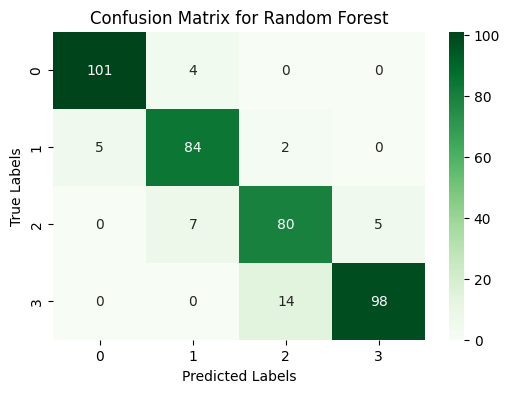

The vales of confusion matrix fo the model:Decision Tree is:
[[ 93  12   0   0]
 [  5  72  14   0]
 [  0  11  73   8]
 [  0   0   9 103]]


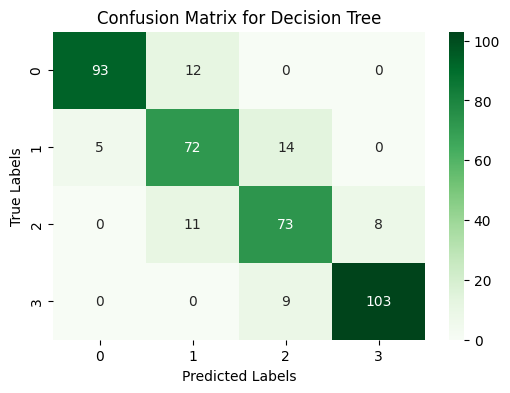

The vales of confusion matrix fo the model:SVM is:
[[ 99   6   0   0]
 [  2  87   2   0]
 [  0   4  84   4]
 [  0   0   7 105]]


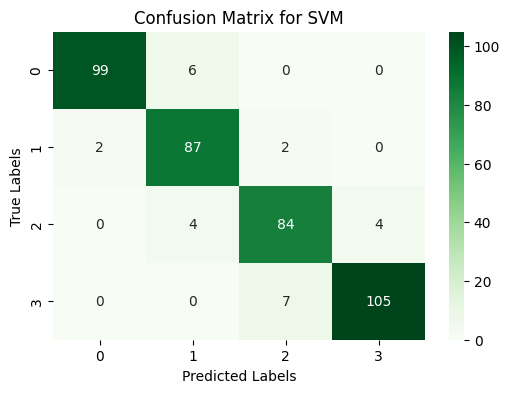

The vales of confusion matrix fo the model:XGBoost is:
[[ 99   6   0   0]
 [  2  86   3   0]
 [  0   9  77   6]
 [  0   0  11 101]]


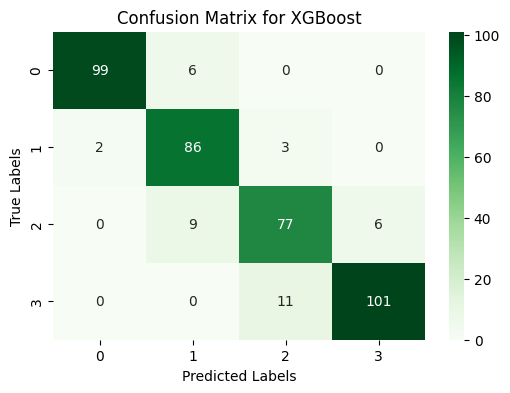

The vales of confusion matrix fo the model:Voting Classifier is:
[[100   5   0   0]
 [  3  86   2   0]
 [  0   6  82   4]
 [  0   0   8 104]]


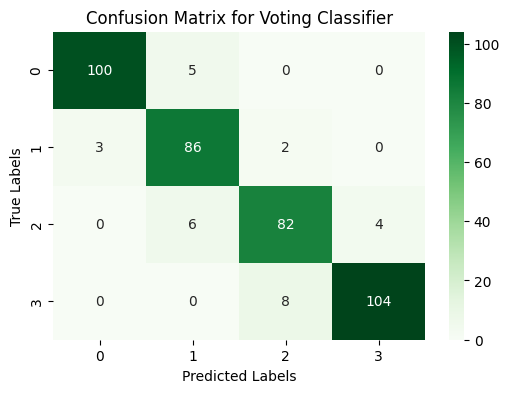

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iterate over each row in the result_copy DataFrame
for idx,row in results_df_tuned_copy.iterrows():
    # Get the model name and predicted values (y_pred)
    model_name = row['Model']
    y_pred = row['y_pred Test']

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix using seaborn heatmap
    print(f"The vales of confusion matrix fo the model:{model_name} is:\n{cm}")
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


#### vusulaization the result

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test_scaled, y_test):
    """
    Plots the ROC-AUC curve for the given model.
    """
    # Get predicted probabilities for the positive class
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.show()


In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_precision_recall_curve(model, X_test_scaled, y_test):
    """
    Plots the Precision-Recall curve and calculates Average Precision.
    """
    # Get predicted probabilities for the positive class
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # Compute precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    
    # Calculate Average Precision (AP) score
    ap_score = average_precision_score(y_test, y_prob)
    
    # Plot Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall curve (AP = {ap_score:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()


In [ ]:
# Iterate over the models in your results
for model_name, model in models.items():
    print(f"Plotting ROC-AUC and Precision-Recall curves for {model_name}")
    
    # Plot ROC-AUC curve
    print(f"THE ROC-AUC CURVE FOR {model}")
    plot_roc_curve(model, X_test_scaled, y_test)
    
    print(f"PLOTING THE PRECISION -RECALL CURVE FOR MODEL {model}")
    # Plot Precision-Recall curve
    plot_precision_recall_curve(model, X_test_scaled, y_test)


Plotting ROC-AUC and Precision-Recall curves for Logistic Regression
THE ROC-AUC CURVE FOR LogisticRegression(max_iter=1000)


ValueError: multiclass format is not supported

##### FOR NEW DATA

In [ ]:
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Assuming your dataset is loaded as X (features) and y (target)
# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Feature selection: Select top 10 features based on f_classif (ANOVA F-test)
# feature_selector = SelectKBest(f_classif, k=10)
# X_train_selected = feature_selector.fit_transform(X_train, y_train)  # Fit and transform on training data
# X_test_selected = feature_selector.transform(X_test)  # Only transform test data

# # Initialize the model (Random Forest or your best model)
# model = RandomForestClassifier(random_state=42)

# # Fit the model on the selected features
# model.fit(X_train_selected, y_train)

# # Evaluate model performance on test data
# y_pred_test = model.predict(X_test_selected)
# accuracy_test = accuracy_score(y_test, y_pred_test)

# print(f"Model Accuracy on Test Data: {accuracy_test:.4f}")

# # Now, for predicting new data:

# # Example of a new data point (replace values with actual data)
# new_data = pd.DataFrame([{
#     'battery_power': 1200,
#     'blue': 1,
#     'clock_speed': 2.0,
#     'dual_sim': 1,
#     'fc': 5,
#     'four_g': 1,
#     'int_memory': 64,
#     'm_dep': 0.8,
#     'mobile_wt': 150,
#     'n_cores': 4,
#     'pc': 12,
#     'px_height': 800,
#     'px_width': 1200,
#     'ram': 2000,
#     'sc_h': 15,
#     'sc_w': 8,
#     'talk_time': 10,
#     'three_g': 1,
#     'touch_screen': 1,
#     'wifi': 1
# }])

# # Apply the same feature selection to the new data
# new_data_selected = feature_selector.transform(new_data)

# # Predict the price range for the new data point
# predicted_price_range = model.predict(new_data_selected)

# # Define the price range labels
# price_range_labels = {
#     0: "Low price range",
#     1: "Medium price range",
#     2: "High price range",
#     3: "Very high price range"
# }

# # Display the predicted price range
# print(f"The predicted price range is: {predicted_price_range[0]}")
# print(f"The phone belongs to: {price_range_labels[predicted_price_range[0]]}")


In [ ]:
# new_data = pd.DataFrame([{
#     'battery_power': 1200,
#     'blue': 1,
#     'clock_speed': 2.0,
#     'dual_sim': 1,
#     'fc': 5,
#     'four_g': 1,
#     'int_memory': 64,
#     'm_dep': 0.8,
#     'mobile_wt': 150,
#     'n_cores': 4,
#     'pc': 12,
#     'px_height': 800,
#     'px_width': 1200,
#     'ram': 2000,
#     'sc_h': 15,
#     'sc_w': 8,
#     'talk_time': 10,
#     'three_g': 1,
#     'touch_screen': 1,
#     'wifi': 1
# }])

In [ ]:
# # Assuming Voting Classifier is the best model
# best_model = VotingClassifier(estimators=[
#     ('logreg', LogisticRegression(C=10, solver='saga', random_state=42)),
#     ('rf', RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)),
#     ('svm', SVC(C=10, kernel='linear', probability=True, random_state=42))
# ], voting='soft')

# # Re-train the model on the entire training data
# X_train_selected = feature_selector.fit_transform(X_train, y_train)
# X_test_selected = feature_selector.transform(X_test)

# best_model.fit(X_train_selected, y_train)

# # Preprocess new data using SelectKBest
# new_data_selected = feature_selector.transform(new_data)

# # Predict price range for the new data
# predicted_price_range = best_model.predict(new_data_selected)

# # Define price range labels
# price_range_labels = {
#     0: "Low price range",
#     1: "Medium price range",
#     2: "High price range",
#     3: "Very high price range"
# }

# # Display the predicted result
# print(f"The predicted price range is: {predicted_price_range[0]}")
# print(f"The phone belongs to: {price_range_labels[predicted_price_range[0]]}")
